<a href="https://colab.research.google.com/github/shannondill/GEOG5990M/blob/main/201896295_GEOG5990M_Portfolio_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Portfolio assignment:

Student ID number: 201896295



## Block One Submission


# **IMPORTAING PACKAGES AND DATASET**

In [ ]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np
# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# set seaborn plotting theme to white
sns.set_theme(style="white")
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
# picking data set
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
#import data set 'car_crashes'
carcrash = sns.load_dataset('car_crashes')

In [ ]:
### CO-PILOT AI ###

#The following prompt was used in co-pilot to gain better understanding of the variables listed in the dataset:
#'Provide indepth background information on sns.load_dataset('car_crashes')'
#The response generated was used to help determine whether variables were percentages, total numbers, or dollar amounts

# **EXPLORING CAR CRASH DATASET**

In [ ]:
# DESCRIBE
carcrash.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [ ]:
# HEAD
carcrash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
#TAIL
carcrash.tail()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


In [ ]:
# SUM
carcrash.sum()

,0
total,805.3
speeding,254.908
alcohol,249.226
not_distracted,692.232
no_previous,714.249
ins_premium,45234.84
ins_losses,6859.15
abbrev,ALAKAZARCACOCTDEDCFLGAHIIDILINIAKSKYLAMEMDMAMI...


In [ ]:
print(carcrash.columns)
print(carcrash.dtypes)

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')
total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object


# **DATA PRE-PROCESSING**

In [ ]:
# column names
carcrash.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [ ]:
# update column names ('abbrev' TO 'state')
carcrash.columns = ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'state']

In [ ]:
# check the column name is updated
carcrash.head(n=2)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK


In [ ]:
carcrash['state'].describe()

,state
count,51
unique,51
top,AL
freq,1


# **DATA VISUALZIATION**

In [ ]:
# Variable Correlation Table
# ensuring numeric columns only are selected
# ('state' is not included as a variable as it is classed as an 'object' in data types)
carcrash_numeric = carcrash.select_dtypes(include=np.number)
carcrash_numeric.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


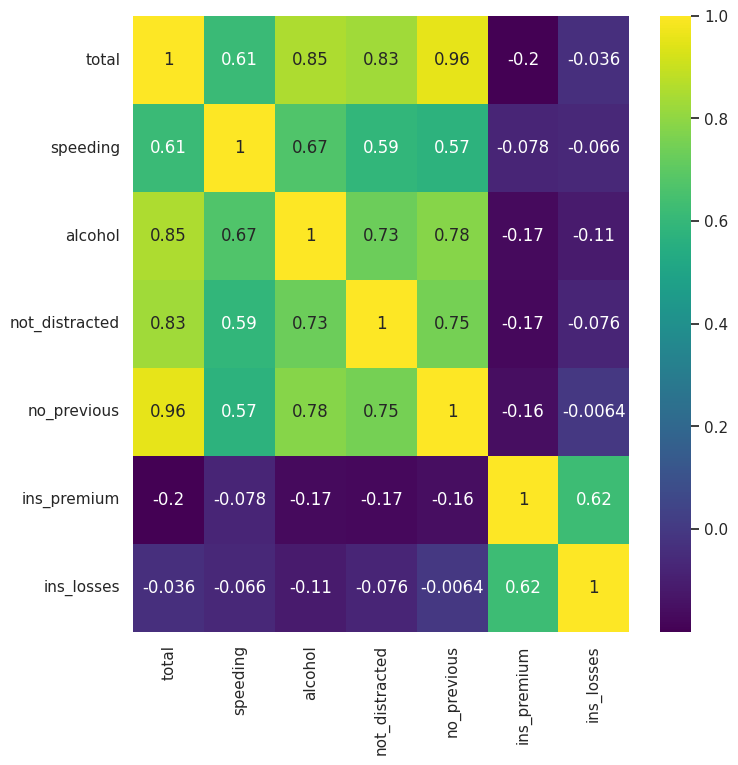

In [ ]:
# Create a heatmap of Variable Correlation
plt.figure(figsize=(8,8))
sns.heatmap(carcrash_numeric.corr(), annot=True, cmap='viridis');

# Viridis colour scheme used to ensure accessibility to those who may be colour blind

[Text(0.5, 1.0, 'Total fatal car crashes where alcohol was a contributing factor'),
 Text(0.5, 0, 'Total fatal car crashes'),
 Text(0, 0.5, 'Alcohol %')]

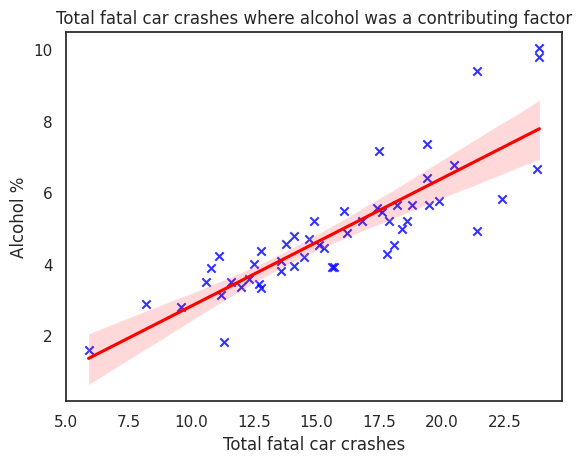

In [ ]:
# Scatter plots with line of best fit for further visualization:
# Total vs Alcohol
sns.regplot(x='total', y='alcohol', data=carcrash, marker='x',
            scatter_kws={'color':'blue'}, line_kws={'color':'red'}).set(
                title='Total fatal car crashes where alcohol was a contributing factor',
                xlabel='Total fatal car crashes', ylabel='Alcohol %')

#### CO-PILOT AI ####
# The following prompt was used in co-pilot to add a line of best fit to the scatter graph
# "How to add a line of best fit on sns.plot.scatter graph"
# The response generated (sns.regplot) was of use as it streamlined processing

[Text(0.5, 1.0, 'Car crashes involving speeding with no previous recorded accidents'),
 Text(0.5, 0, 'Speeding %'),
 Text(0, 0.5, 'No previous accidents %')]

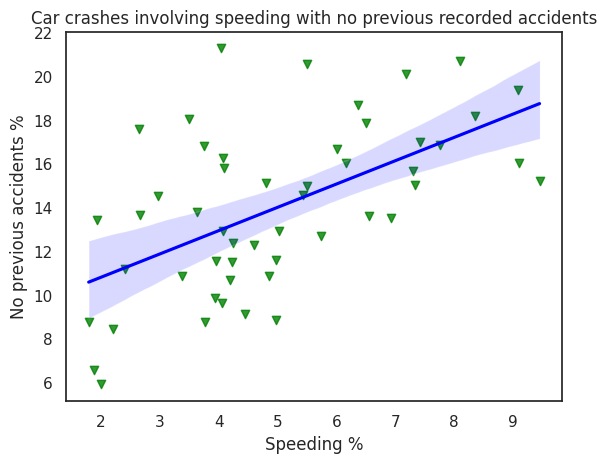

In [ ]:
# Speeding vs no_previous
sns.regplot(x='speeding', y='no_previous', data=carcrash, marker='v',
            scatter_kws={'color':'green'}, line_kws={'color':'blue'}).set(
                title='Car crashes involving speeding with no previous recorded accidents',
                xlabel='Speeding %', ylabel='No previous accidents %')

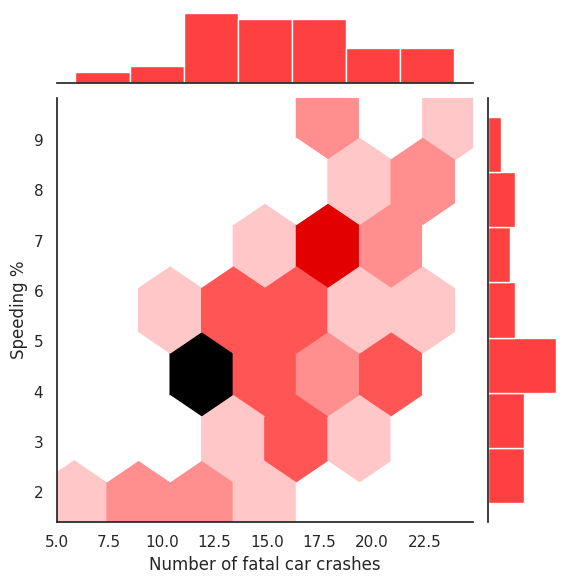

In [ ]:
# joint plot
# Total vs speeding
sns.jointplot(x='total', y='speeding', kind='hex', data=carcrash, color='red').set_axis_labels(
    # create axis labels (1)
    xlabel='Number of fatal car crashes', ylabel='Speeding %')

### Block One Submission
The seaborn (sns) dataset car_crashes was used to perform visual analysis for Block 1.  The main data cleaning and processing step taken was to change the column name (abbrev) to ‘state’ for easier understanding of the variable column.  To determine which variables to delve into deeper analysis, a correlation table was made to determine which factors had the highest correlation: total and alcohol having a correlation of 0.85.  Viridis colour palette was used to produce a correlation heat map that is colour blind-friendly, and highlighting correlations both visually and numerically.  The initial scatter plot used the two most correlated variables (‘total’ and ‘alcohol’).  This highlighted that as the total number of fatal car crashes increased, the percentage of alcohol as a contributing factor did as well; suggesting that alcohol has a direct effect on fatal car crashes.  The second scatter plot explores the relationship between speeding and car accidents.  As speeding events increase, the higher the chance of a car crash, regardless of whether the driver has had a previous accident or not.  The final variable comparison is a hex jointplot detailing the relationship between total fatal car crashes and speeding.

All axis labels and graph titles were changed to better describe the scatterplots, as well as axis labels being added to the seaborn hex jointplot (1).










    

## Block Two Submission:


# **IMPORTING PACKAGES AND DATA**

In [ ]:
# import further required packages
! pip install contextily
! pip install geoplot
! pip install git+https://github.com/pmdscully/geo_northarrow.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 89.5 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-51fzpors
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-51fzpors
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14725 sha256=320ea3be96e80bb0c19f5f987e7cf66926a64b5cc1ad9ad0a5211577446125c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-6z68zos1/wheels/6a/22/96/2e5d1215f457d6b69b44cbaa1a0d3b822bc656dcabcda80095
Successfully built geo_northarrow


In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow
import contextily as ctx

In [ ]:
# USA spatial data
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [ ]:
# USA state names
state_names = gpd.read_file('usa_names.csv')
state_names.head()

,Full_name,Traditional,Abbrev
0,Alabama,Ala.,AL
1,Alaska,Alaska or Alas.,AK
2,Arkansas,Ark.,AR
3,Arizona,Ariz.,AZ
4,California,Calif.,CA


# **DATA PRE-PROCESSING**

In [ ]:
# make contiguous USA column names all lower case for simpler table joining
contiguous_usa.columns = contiguous_usa.columns.str.lower()
contiguous_usa.columns
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [ ]:
# make state_names all lower case
state_names.columns = state_names.columns.str.lower()
state_names.columns

Index(['full_name', 'traditional', 'abbrev'], dtype='object')

In [ ]:
# Table join (left)
# state_names -- contiguous_usa
usa_states = pd.merge(state_names, contiguous_usa, left_on='full_name', right_on='state', how='left')
usa_states.head()

,full_name,traditional,abbrev,state,adm1_code,population,geometry
0,Alabama,Ala.,AL,Alabama,USA-3541,4779736.0,"POLYGON ((-85.05442 31.1087, -85.00519 30.9906..."
1,Alaska,Alaska or Alas.,AK,NaN,NaN,NaN,None
2,Arkansas,Ark.,AR,Arkansas,USA-3528,2915918.0,"POLYGON ((-89.66292 36.02307, -89.67351 35.94,..."
3,Arizona,Ariz.,AZ,Arizona,USA-3520,6392017.0,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
4,California,Calif.,CA,California,USA-3521,37253956.0,"POLYGON ((-114.3549 34.46467, -114.16597 34.27..."


In [ ]:
# Table Join (left)
# usa_states -- carcrash
carcrash_usa = pd.merge(usa_states, carcrash, left_on='abbrev', right_on='state', how='left')
carcrash_usa.head()

,full_name,traditional,abbrev,state_x,adm1_code,population,geometry,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state_y
0,Alabama,Ala.,AL,Alabama,USA-3541,4779736.0,"POLYGON ((-85.05442 31.1087, -85.00519 30.9906...",18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,Alaska,Alaska or Alas.,AK,NaN,NaN,NaN,None,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,Arkansas,Ark.,AR,Arkansas,USA-3528,2915918.0,"POLYGON ((-89.66292 36.02307, -89.67351 35.94,...",22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
3,Arizona,Ariz.,AZ,Arizona,USA-3520,6392017.0,"POLYGON ((-109.04522 36.99991, -109.04367 31.3...",18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
4,California,Calif.,CA,California,USA-3521,37253956.0,"POLYGON ((-114.3549 34.46467, -114.16597 34.27...",12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
# Ensure it is saved as a GeoDataFrame (to make use of the geometry)
carcrash_usa = gpd.GeoDataFrame(carcrash_usa)

In [ ]:
# Ensure correct coordinate system = EPSG:4326 (2)
carcrash_usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
carcrash_usa.explore()

# **DASTA VISUALIZATION**

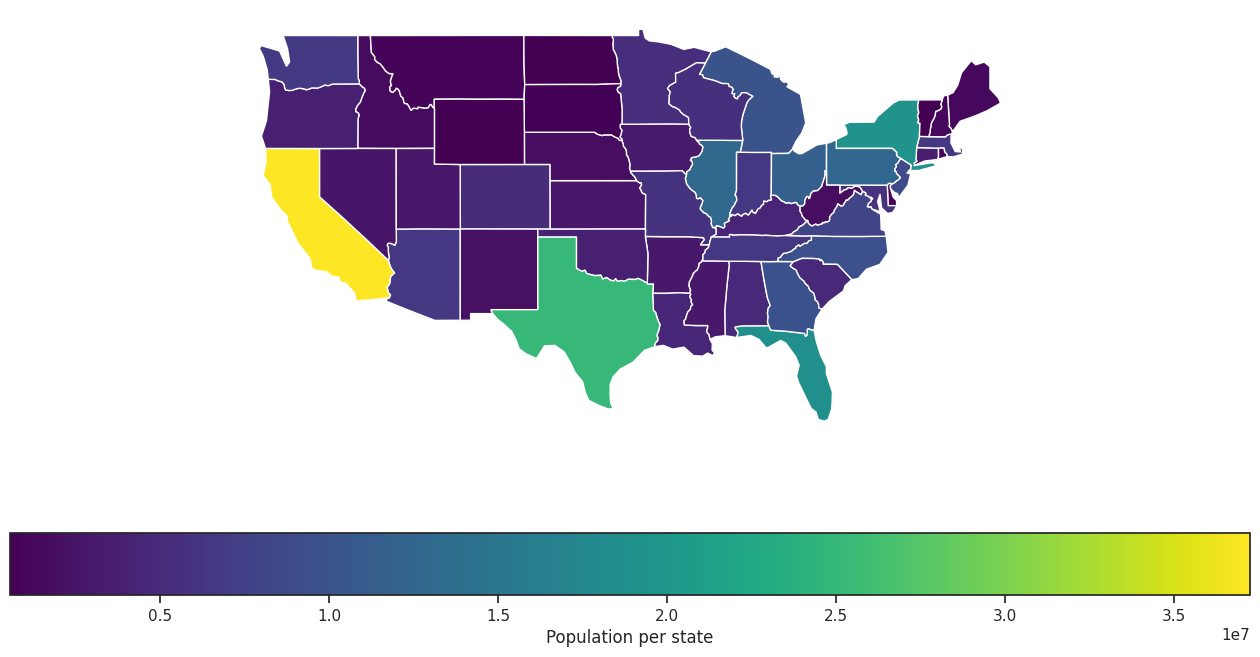

In [ ]:
# Choropleth map
# population
f,ax= plt.subplots(1, figsize=(16,8))
carcrash_usa.plot(ax=ax, column='population', legend=True,
                  cmap='viridis', legend_kwds={'label': 'Population per state',
                                                                        'orientation':'horizontal'});
# Viridis colour scheme used to ensure accessibility to those who may be colour blind
# make axis invisible
ax.set_axis_off()
plt.show()
# creating a horizontal legend (3)

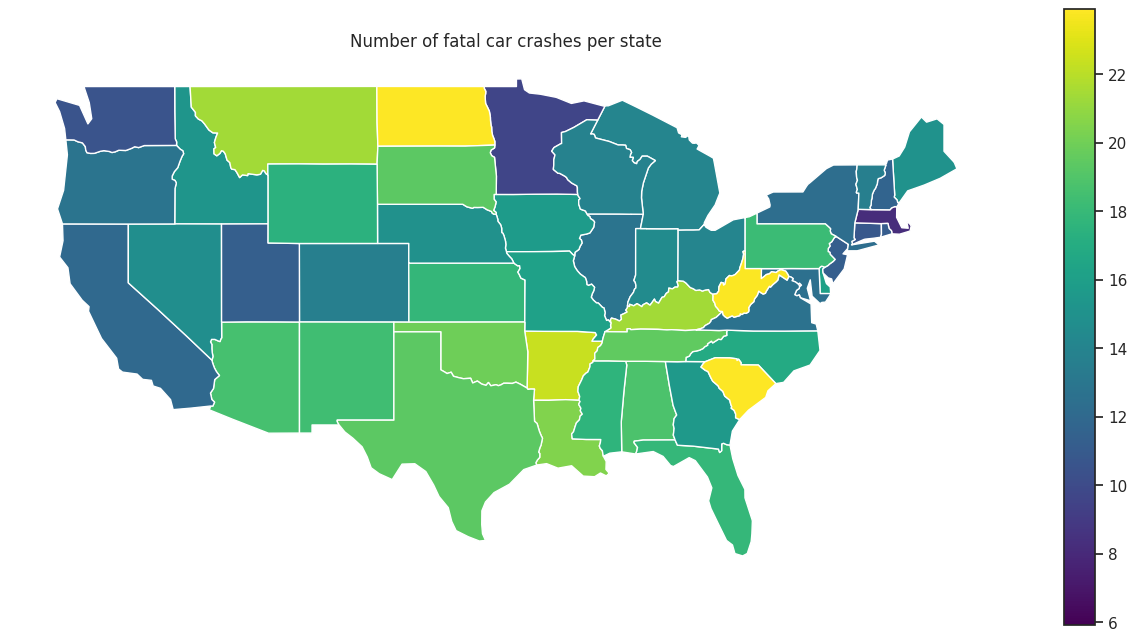

In [ ]:
# Choropleth map: total num crashes per state
f,ax = plt.subplots(1, figsize=(16,8))
carcrash_usa.plot(ax=ax, column='total', legend=True, cmap='viridis').set(
    title='Number of fatal car crashes per state')
# Viridis colour scheme used to ensure accessibility to those who may be colour blind
# make axis invisible
ax.set_axis_off()
plt.show()

In [ ]:
# Create an interactive choropleth map showing the total number of fatal car crashes (4)
carcrash_usa.explore(
    column='total', tooltip='total',
    popup=True, cmap='Set1', style_kwds=dict(color='black'))


In [ ]:
carcrash_usa.columns

Index(['full_name', 'traditional', 'abbrev', 'state_x', 'adm1_code',
       'population', 'geometry', 'total', 'speeding', 'alcohol',
       'not_distracted', 'no_previous', 'ins_premium', 'ins_losses',
       'state_y'],
      dtype='object')

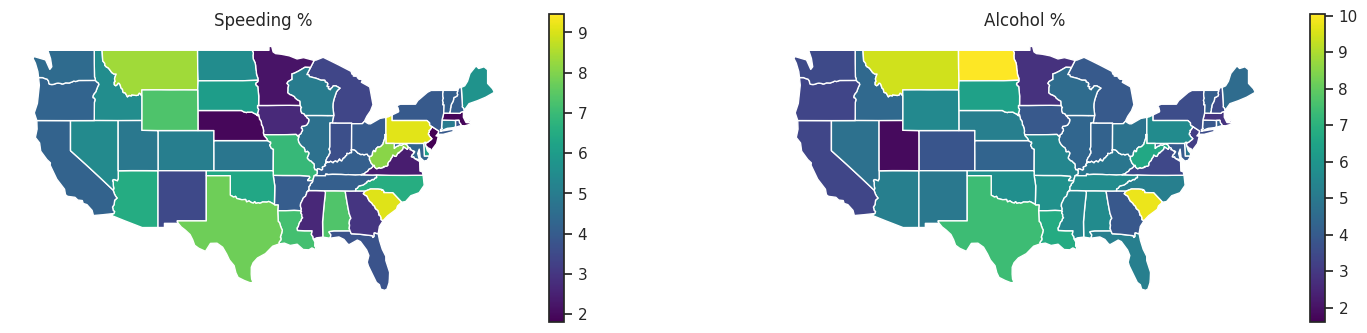

In [ ]:
# 2 subplot maps: speeding & alcohol
f,ax = plt.subplots(1,2, figsize=(18,4))
# plot speeding
carcrash_usa.plot(ax=ax[0], column='speeding', legend=True, cmap='viridis')
#plot alcohol
carcrash_usa.plot(ax=ax[1], column='alcohol', legend=True, cmap='viridis')
# Viridis colour scheme used to ensure accessibility to those who may be colour blind

#plot 1 title
ax[0].set_title('Speeding %')
#plot 1 axis invisible
ax[0].set_axis_off()

#plot 2 title
ax[1].set_title('Alcohol %')
#plot 2 axis invisible
ax[1].set_axis_off()


plt.show()

In [ ]:
# Create an interactive choropleth map based on 'ins_premium'(4)
carcrash_usa.explore(
    column='ins_premium', tooltip='ins_premium',
    popup=True, cmap='Set1', style_kwds=dict(color='black'))


### Block Two Submission
To accomplish table joins between the car crash dataset and the contiguous USA geospatial data, the contiguous_usa variable names were updated to all lower case, as to remove any unnecessary confusion.  Two table joins were needed to accomplish this: the first being the contiguous_usa left joined to the state_names dataset.  After this join, producing usa_states, another left join was used to merge the carcrash data to create  carcrash_usa.  This holds both non-spatial and spatial variables.

To visualize the carcrash_usa data, choropleth maps were used.  These type of maps provide an overview of variable trends that are easy to understand.  

The choropleth map (‘Number of fatal car crashes per state’) shows that North Dakota, Arkansas, South Carolina, and West Virginia have the most number of fatal car crashes, ranging from 22-24.  The District of Columbia holds the lowest number of fatal car crashes with 6.  An interactive choropleth map showing the number of fatal car crashes was also made as it provides greater detail on precise totals (when hovered over the state) instead of estimating from a choropleth colour ramp (4).

The following maps give more insight into other variables that may affect the rate and number of car crashes.  For instance, alcohol is a large contributing factor, as also noted in the correlation table in the above section.  Two subplot maps of alcohol and speeding were made to portray their relationship side by side for clear comparison.







# **ACKNOWLEDGEMENTS**

I acknowlege the use of Co-pilot AI (Mircosoft, https://copilot.microsoft.com/chats/LTPVymuDAUXi2BxbMMYFC) to provide background information on the car crash data source and variables; as well as assist in understanding how to create a scatter plot with a line of best fit.

Prompt: provide indepth background information on sns.load_dataset('car_crashes')

Prompt: how to add a line of best fit on sns.plot.scatter graph

# **REFERENCES**

(2) EPSG.IO. ESRI:102003. [Online]. n.d. [20/03/2025]. Available from: https://epsg.io/102003

(4) GeoPandas. Interactive Mapping. [Online]. 2013. [23/03/2025]. Available from: https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

(3) GeoPandas. Mapping and plotting tools. [Online]. 2013. [20/03/2025]. Available from: GeoPandas. Interactive Mapping. [Online]. 2013. [23/03/2025]. Available from: https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html



(1) StackOverflow. Correctly add a legend to a seaborn jointplot. [Online]. 2021. [23/03/2025]. Available from: https://stackoverflow.com/questions/62937646/correctly-add-a-legend-to-a-seaborn-jointplot